# The draining cup problem

In this notebook we will 

In [2]:
from IPython import display

In this notebook we will be modelling a draining cup. We assume the cup is shaped like a $conical frustrum$ or $truncated cone$:

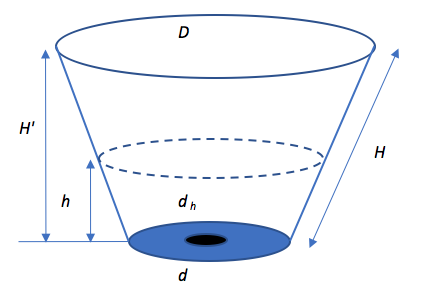

In [4]:
display.Image("./cup.png")

$D$ and $d$ are the top and bottom diameters of the cup, $H$ is the side length between the diameters, $dh$
is the hole diameter. We also define $H'$ as the vertical height of the cup and $h$ 
as the vertical height (or level) of the liquid in the cup

## 8.1 Volume-height relationship

Let's workout the relationship between the volume of water and the level in the cup by integrating the area: 

$$ V= \int_0^h A(x) dh$$

In [5]:
import sympy 
sympy.init_printing()

In [6]:
D, d, H, h = sympy.symbols('D, d, H, h', real = True)

In [7]:
R = D/2
r = d/2
Hprime = sympy.sqrt(H**2 - (R - r) **2) # Pythagoras

In [8]:
radius = r + h/Hprime*(R - r)

In [9]:
A = sympy.pi*radius**2

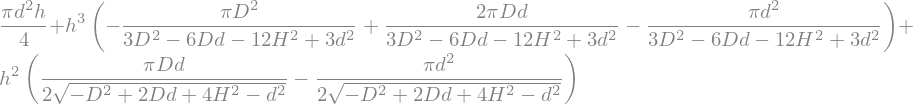

In [10]:
V = sympy.integrate(A, (h, 0, h))
V

In [11]:
print(V)

pi*d**2*h/4 + h**3*(-pi*D**2/(3*D**2 - 6*D*d - 12*H**2 + 3*d**2) + 2*pi*D*d/(3*D**2 - 6*D*d - 12*H**2 + 3*d**2) - pi*d**2/(3*D**2 - 6*D*d - 12*H**2 + 3*d**2)) + h**2*(pi*D*d/(2*sqrt(-D**2 + 2*D*d + 4*H**2 - d**2)) - pi*d**2/(2*sqrt(-D**2 + 2*D*d + 4*H**2 - d**2)))
